In [4]:
# 1. 分析数据量
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
csv_paths = ['./dataset/level1/test.csv',
             './dataset/level1/train.csv', './dataset/level1/val.csv']
total = 518593

for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    print(f"文件: {csv_path}")
    print(f"数据量: {len(df)}")
    print(f"数据量占比: {len(df)/total:.2%}")
    print(f"列数: {len(df.columns)}")
    print(f"列名: {df.columns.tolist()}")
    print(f"数据类型: {df.dtypes}")
    print(f'{"分割线":*^100}')

# print(f"总数据量: {total}")

文件: ./dataset/level1/test.csv
数据量: 25930
数据量占比: 5.00%
列数: 13
列名: ['item_id', 'shop_id', 'name', 'global_be_category_id', 'global_be_category', 'global_be_category_level', 'level1_global_be_category_id', 'level2_global_be_category_id', 'level3_global_be_category_id', 'level4_global_be_category_id', 'main_image', 'attached_images', 'clean_name']
数据类型: item_id                           int64
shop_id                           int64
name                             object
global_be_category_id             int64
global_be_category               object
global_be_category_level          int64
level1_global_be_category_id      int64
level2_global_be_category_id      int64
level3_global_be_category_id    float64
level4_global_be_category_id    float64
main_image                       object
attached_images                  object
clean_name                       object
dtype: object
************************************************分割线*************************************************
文件: ./dataset

In [5]:
# 随机采样，查看标题和类别
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from utils.category import load_category_list, category_list_to_dict
category_list = load_category_list('./json/mtsku_category_tree.json')
category_dict = category_list_to_dict(category_list)

csv_paths = ['./dataset/level1/test.csv',
             './dataset/level1/train.csv', './dataset/level1/val.csv']
total = 274423
target_index = 2

start_time = time.time()
for index, csv_path in enumerate(csv_paths):
    if index != target_index:
        continue

    # 读取指定的几列
    df = pd.read_csv(csv_path, usecols=[
                     'name', 'level1_global_be_category_id'])
    print(f"文件: {csv_path}")
    for index, row in df.sample(10).iterrows():
        print(
            f"{row['name']} --- {category_dict[row['level1_global_be_category_id']]['display_name']}")
    print(f'{"分割线":*^100}')

end_time = time.time()
print(f"读取时间: {end_time - start_time:.2f} 秒")

文件: ./dataset/level1/val.csv
family matching clothes big litter man tshirt daddy and me outfits father son dad baby boy kids summer clothing brothers --- 女装
Twsg Carbon Steel Bicycle Spanner Wrench For 13mm 14mm 15mm 16mm 17mm 18mm 19mm Cone Motivated --- 家居生活
Refillable 3Pcs 10ml Empty Mascara Tube Wand Eyelash Cream Container Bottle --- 美妆保健
【HLCM】 30G Activated Charcoal Teeth Whitening Cleaning Powder Bamboo Charcoal Toothbrush Oral Hygiene Tooth Cleaner Whitener --- 保健
Tangerine Thai Honey Mango --- 食品饮料
Siri Buku Pendidikan Islam Peringkat Rendah Darjah 1-6 BUKU KERJA Darul Andalus (ANDALUS SINGAPORE) --- 书籍 & 杂志
Anessa Day Serum 30ML --- 美妆保健
2022 New Garnier Bright Complete Anti Acne Serum 30ML with Niacinamide, Fight Acne, Fade Acne Marks and Spots, Control Skin --- 美妆保健
Paul & Vivi Baby Wipes Wet Tissue Cap Type [100Pcs] --- 母婴
Mini Fan Electric Fan Rechargable Fan Desktop Fans Travel Handheld Fan Portable HandyFan Cooling Fan --- 手机平板与配件
**************************************

In [32]:
# 类别计数
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from utils.category import load_category_list, category_list_to_dict
category_list = load_category_list('./json/mtsku_category_tree.json')
category_dict = category_list_to_dict(category_list)

csv_paths = ['./dataset/level1/train.csv',
             './dataset/level1/test.csv',
             './dataset/level1/val.csv']
total = 274423
target_index = 0

start_time = time.time()
for index, csv_path in enumerate(csv_paths):
    if index != target_index:
        continue

    # 读取指定的几列
    df = pd.read_csv(csv_path, usecols=[
                     'name', 'level1_global_be_category_id'])
    print(f"文件: {csv_path}")
    print(f'数据总量: {len(df)}')
    # 遍历 value_counts() 结果
    for category_id, count in df['level1_global_be_category_id'].value_counts()[-15:].items():
        print(
            f"{category_dict[category_id]['display_name']}: {count}: {count/len(df):.2%}")

    print(f'{"分割线":*^100}')

end_time = time.time()
print(f"读取时间: {end_time - start_time:.2f} 秒")

文件: ./dataset/level1/train.csv
数据总量: 466733
男装: 7491: 1.60%
汽车类: 6366: 1.36%
女包: 5418: 1.16%
影音娱乐: 5064: 1.08%
旅行用品&行李箱: 4540: 0.97%
女鞋: 4186: 0.90%
穆斯林服饰: 3519: 0.75%
书籍 & 杂志: 2800: 0.60%
票务、优惠券与服务: 2744: 0.59%
男鞋: 2062: 0.44%
游戏电玩: 1873: 0.40%
手表: 1866: 0.40%
摄影摄像: 1832: 0.39%
男包: 1625: 0.35%
摩托车类: 1168: 0.25%
************************************************分割线*************************************************
读取时间: 1.31 秒


文件: ./dataset/level1/train.csv


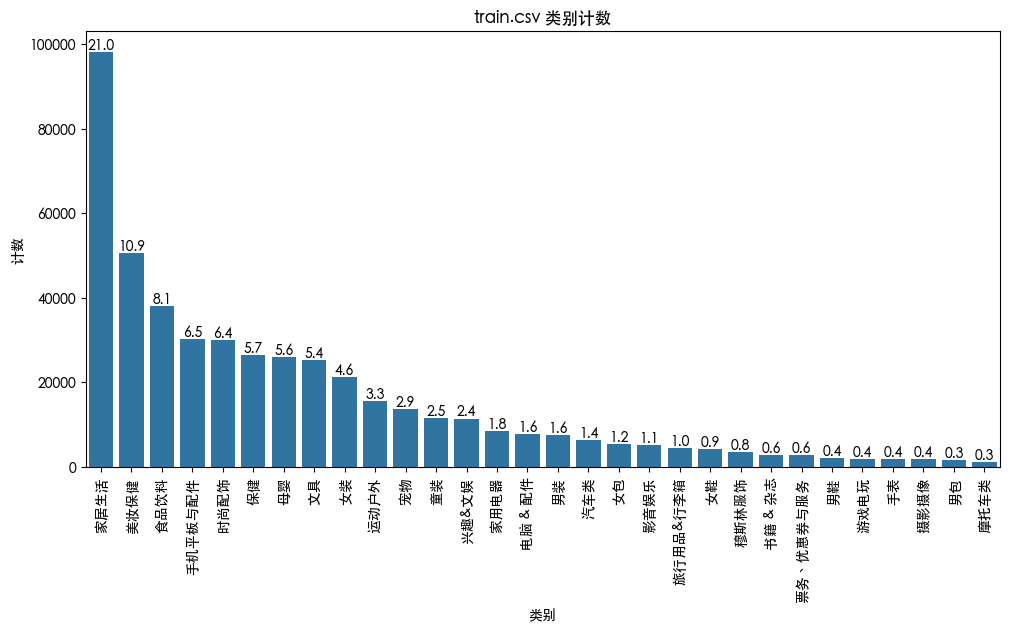

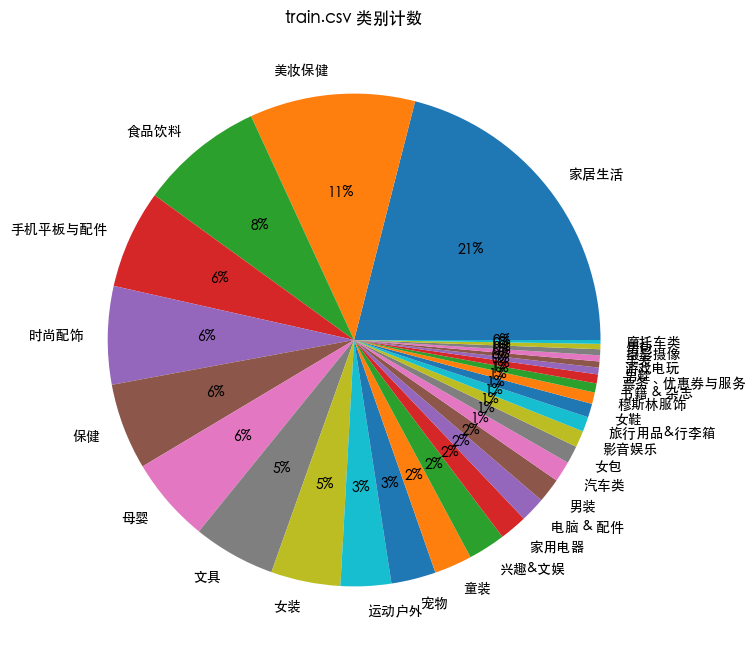

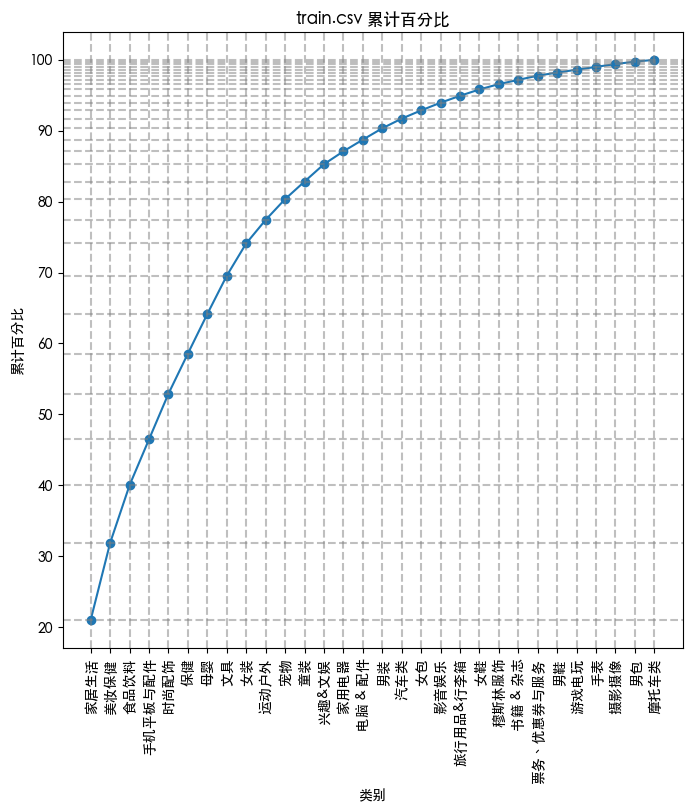

文件: ./dataset/level1/test.csv


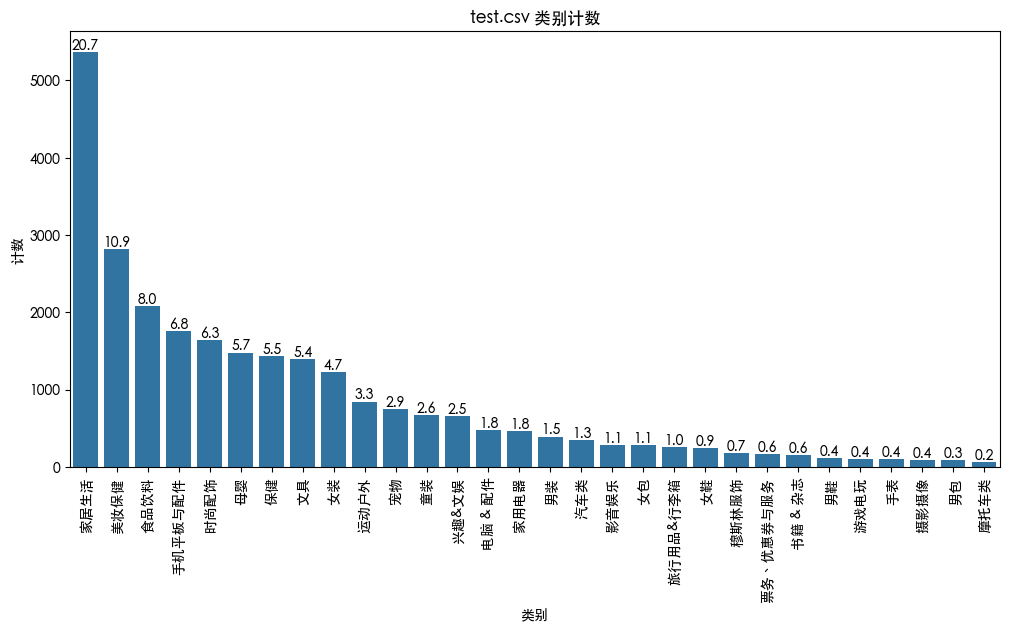

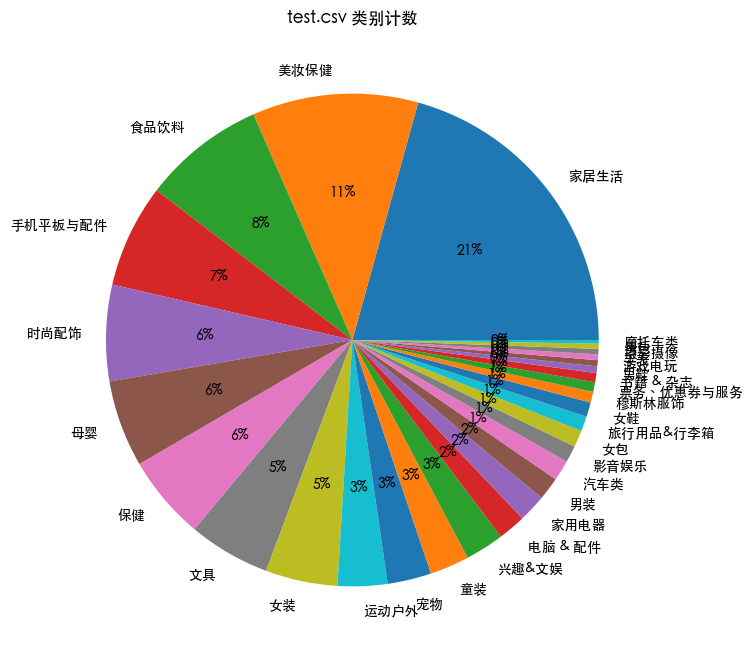

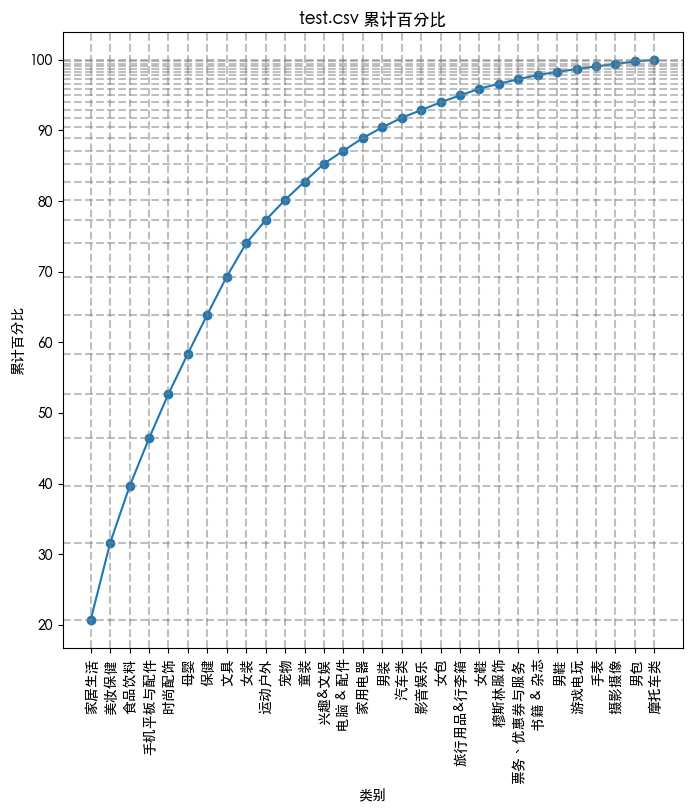

文件: ./dataset/level1/val.csv


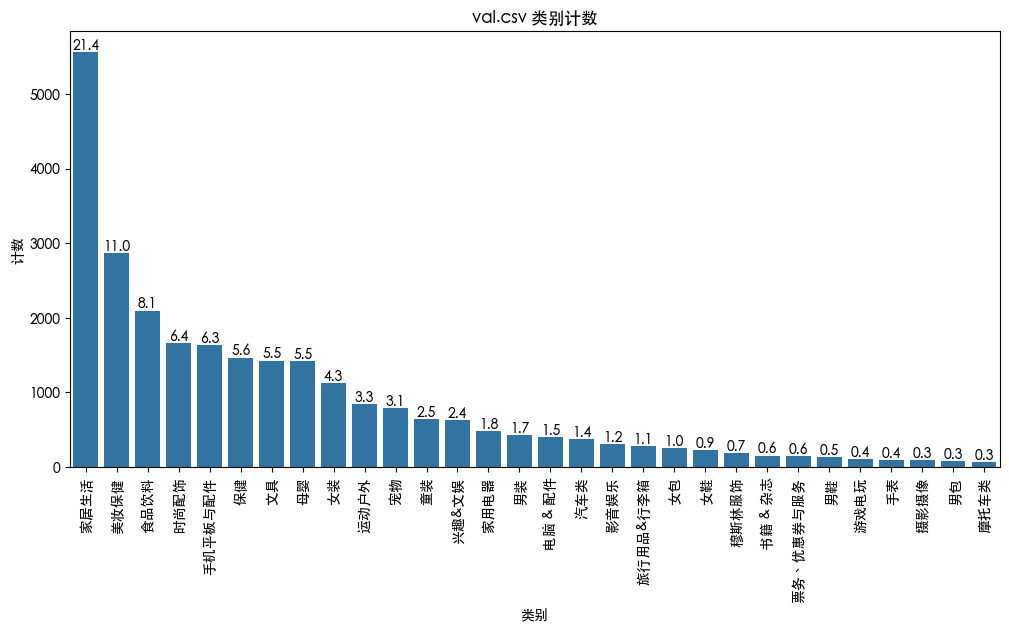

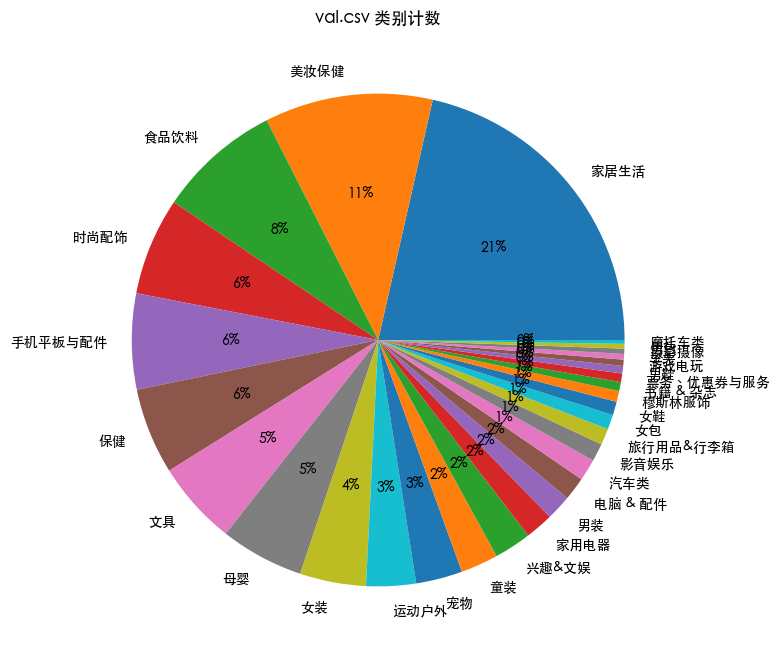

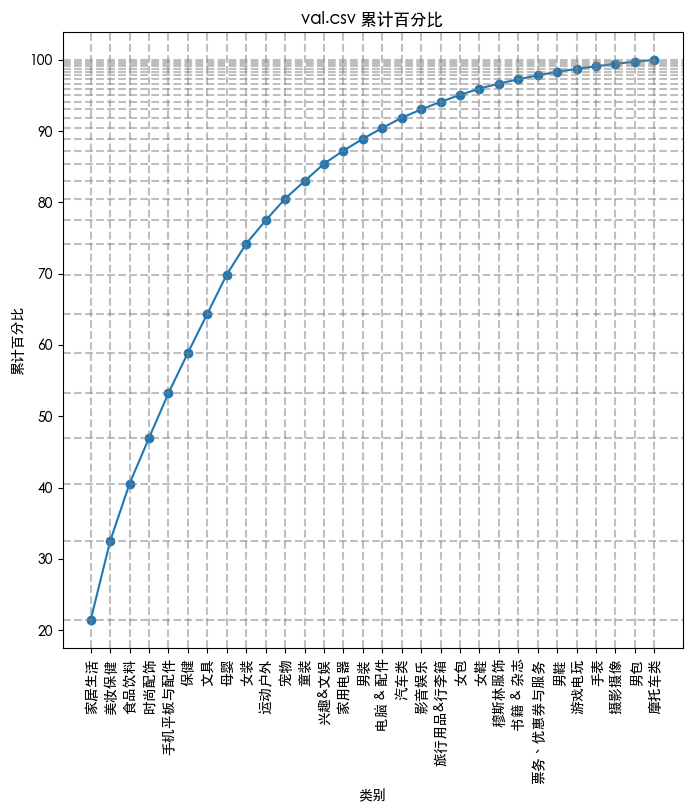

读取时间: 2.93 秒


In [30]:
# 类别计数, 绘制柱状图或饼图
from utils.category import load_category_list, get_category_name
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方框的问题

category_list = load_category_list('./json/mtsku_category_tree.json')

csv_paths = ['./dataset/level1/train.csv',
             './dataset/level1/test.csv',
             './dataset/level1/val.csv']
total = 274423
target_index = 0

start_time = time.time()
for index, csv_path in enumerate(csv_paths):
    # if index != target_index:
    #     continue

    # 读取指定的几列
    file_name = csv_path.split('/')[-1]
    df = pd.read_csv(csv_path, usecols=[
                     'name', 'level1_global_be_category_id'])
    print(f"文件: {csv_path}")
    # 将 value_counts() 结果绘制为柱状图或饼图
    plt.figure(figsize=(10, 6))
    value_counts = df['level1_global_be_category_id'].value_counts()
    category_names = [get_category_name(id, category_list)
                      for id in value_counts.index]
    # 绘制柱状图
    ax = sns.barplot(x=category_names, y=value_counts.values)
    plt.xticks(rotation=90)  # 将x轴标签旋转90度

    # 添加百分比标签
    total = value_counts.values.sum()
    for i, v in enumerate(value_counts.values):
        percentage = v / total * 100
        ax.text(i, v, f'{percentage:.1f}',
                ha='center',  # 水平居中对齐
                va='bottom',  # 垂直对齐到底部
                fontsize=10)  # 字体大小

    plt.tight_layout()  # 自动调整子图参数，防止标签被切割
    plt.title(f'{file_name} 类别计数')
    plt.xlabel('类别')
    plt.ylabel('计数')
    plt.show()

    # 绘制饼图
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts.values, labels=category_names, autopct='%1.0f%%')
    plt.title(f'{file_name} 类别计数')
    plt.show()

    # 绘制累计百分比
    plt.figure(figsize=(8, 8))
    cumulative_percentage = np.cumsum(value_counts.values) / total * 100
    plt.plot(category_names, cumulative_percentage, marker='o')
    # 添加每个点的水平、垂直虚线
    for i, v in enumerate(cumulative_percentage):
        plt.axhline(y=v, color='gray', linestyle='--', alpha=0.5)
        plt.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
    plt.xticks(rotation=90)  # 将x轴标签旋转90度
    plt.title(f'{file_name} 累计百分比')
    plt.xlabel('类别')
    plt.ylabel('累计百分比')
    plt.show()

end_time = time.time()
print(f"读取时间: {end_time - start_time:.2f} 秒")

文件: ./dataset/level1/train.csv
数据总量: 466733
每个标题的 token 数量: count    466733.000000
mean         13.825097
std           5.756601
min           1.000000
25%          10.000000
50%          13.000000
75%          17.000000
max          64.000000
Name: token_count, dtype: float64


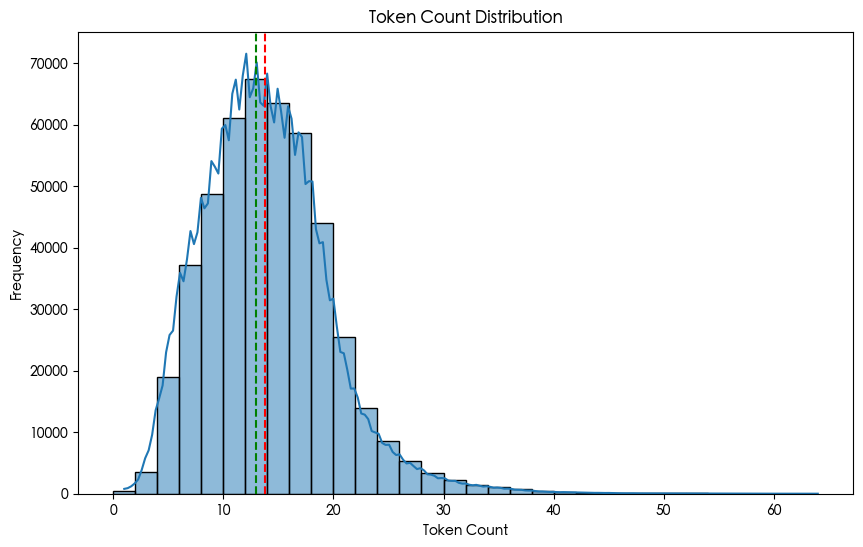

读取时间: 2.34 秒
************************************************分割线*************************************************
文件: ./dataset/level1/test.csv
数据总量: 25930
每个标题的 token 数量: count    25930.000000
mean        13.833552
std          5.760092
min          1.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         57.000000
Name: token_count, dtype: float64


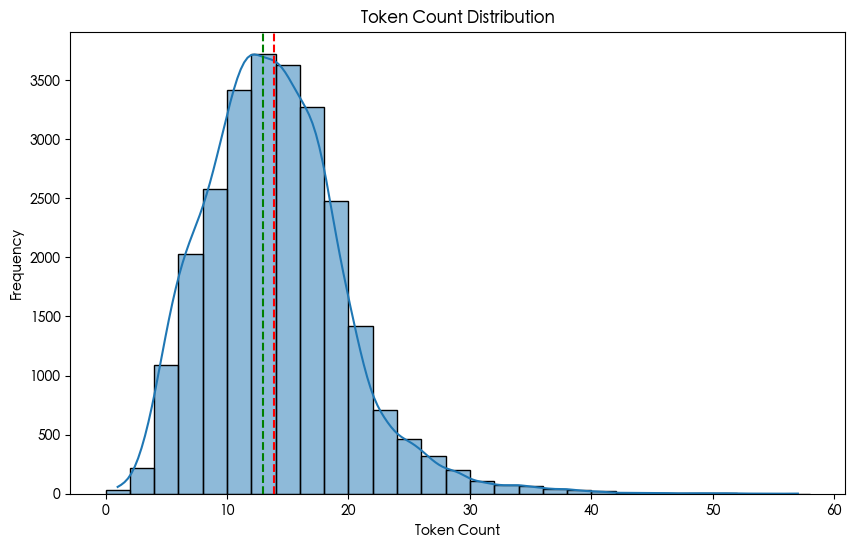

读取时间: 0.37 秒
************************************************分割线*************************************************
文件: ./dataset/level1/val.csv
数据总量: 25930
每个标题的 token 数量: count    25930.000000
mean        13.845700
std          5.750899
min          1.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         61.000000
Name: token_count, dtype: float64


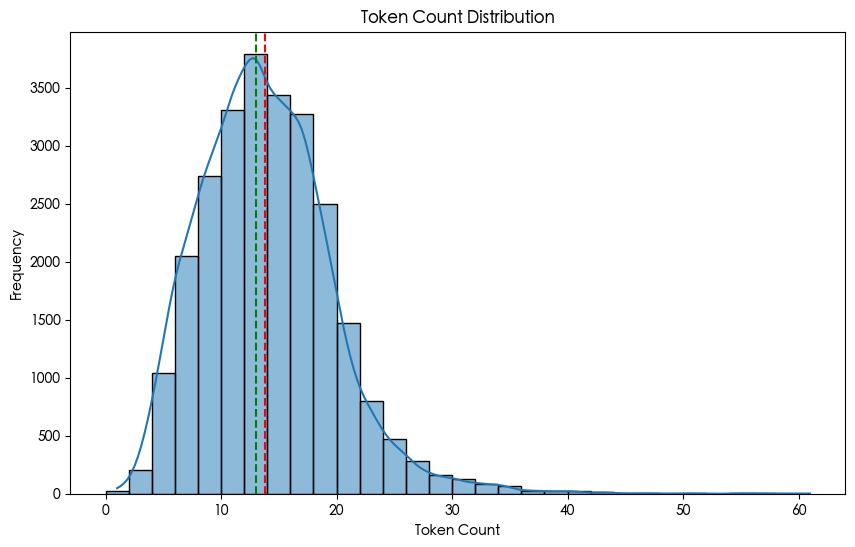

读取时间: 0.41 秒
************************************************分割线*************************************************


In [67]:
# token 计数 (空格分割)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from utils.category import load_category_list, category_list_to_dict
category_list = load_category_list('./json/mtsku_category_tree.json')
category_dict = category_list_to_dict(category_list)

csv_paths = ['./dataset/level1/train.csv',
             './dataset/level1/test.csv',
             './dataset/level1/val.csv']
total = 274423
target_index = 0


for index, csv_path in enumerate(csv_paths):
    # if index != target_index:
    #     continue

    start_time = time.time()
    # 读取指定的几列
    df = pd.read_csv(csv_path, usecols=[
                     'name', 'level1_global_be_category_id'])
    print(f"文件: {csv_path}")
    print(f'数据总量: {len(df)}')

    # 计算每个标题的 token 数量
    df['token_count'] = df['name'].apply(lambda x: len(x.split()))
    print(f'每个标题的 token 数量: {df["token_count"].describe()}')

    mean_count = df['token_count'].mean()  # 平均数
    median_count = df['token_count'].median()  # 中位数

    # 绘制 df['token_count'] 分布直方图 📊
    plt.figure(figsize=(10, 6))
    sns.histplot(df['token_count'], bins=range(0, 60, 2), kde=True)
    # 添加平均数和中位数的垂直线
    plt.axvline(mean_count, color='red', linestyle='--',
                label=f'Mean: {mean_count:.1f}')
    plt.axvline(median_count, color='green', linestyle='--',
                label=f'Median: {median_count:.1f}')
    plt.title('Token Count Distribution')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()

    end_time = time.time()
    print(f"读取时间: {end_time - start_time:.2f} 秒")
    print(f'{"分割线":*^100}')

文件: ./dataset/level1/train.csv
数据总量: 466733
每个标题的 token 数量: count    466733.000000
mean         14.836615
std           5.983503
min           1.000000
25%          11.000000
50%          14.000000
75%          18.000000
max         135.000000
Name: token_count, dtype: float64


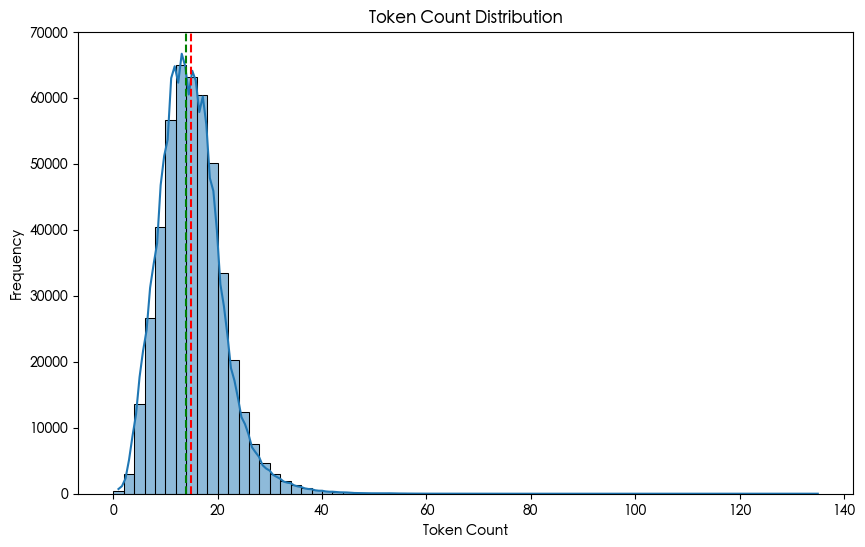

读取时间: 25.32 秒
************************************************分割线*************************************************


In [69]:
# token 计数 (nltk)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from utils.vocab import tokenize, tokenize_spacy
from utils.category import load_category_list, category_list_to_dict
category_list = load_category_list('./json/mtsku_category_tree.json')
category_dict = category_list_to_dict(category_list)

csv_paths = ['./dataset/level1/train.csv',
             './dataset/level1/test.csv',
             './dataset/level1/val.csv']
total = 274423
target_index = 0


for index, csv_path in enumerate(csv_paths):
    if index != target_index:
        continue

    start_time = time.time()
    # 读取指定的几列
    df = pd.read_csv(csv_path, usecols=[
                     'name', 'level1_global_be_category_id'])
    print(f"文件: {csv_path}")
    print(f'数据总量: {len(df)}')

    # 计算每个标题的 token 数量
    df['token_count'] = df['name'].apply(lambda x: len(tokenize(x)))
    print(f'每个标题的 token 数量: {df["token_count"].describe()}')

    mean_count = df['token_count'].mean()  # 平均数
    median_count = df['token_count'].median()  # 中位数

    # 绘制 df['token_count'] 分布直方图 📊
    plt.figure(figsize=(10, 6))
    sns.histplot(df['token_count'], bins=range(0, 136, 2), kde=True)

    # 添加平均数和中位数的垂直线
    plt.axvline(mean_count, color='red', linestyle='--',
                label=f'Mean: {mean_count:.1f}')
    plt.axvline(median_count, color='green', linestyle='--',
                label=f'Median: {median_count:.1f}')

    plt.title('Token Count Distribution')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()

    end_time = time.time()
    print(f"读取时间: {end_time - start_time:.2f} 秒")
    print(f'{"分割线":*^100}')

文件: ./dataset/level1/train.csv
数据总量: 466733
每个标题的 token 数量: count    466733.000000
mean         15.941660
std           6.503626
min           1.000000
25%          11.000000
50%          15.000000
75%          20.000000
max         247.000000
Name: token_count, dtype: float64


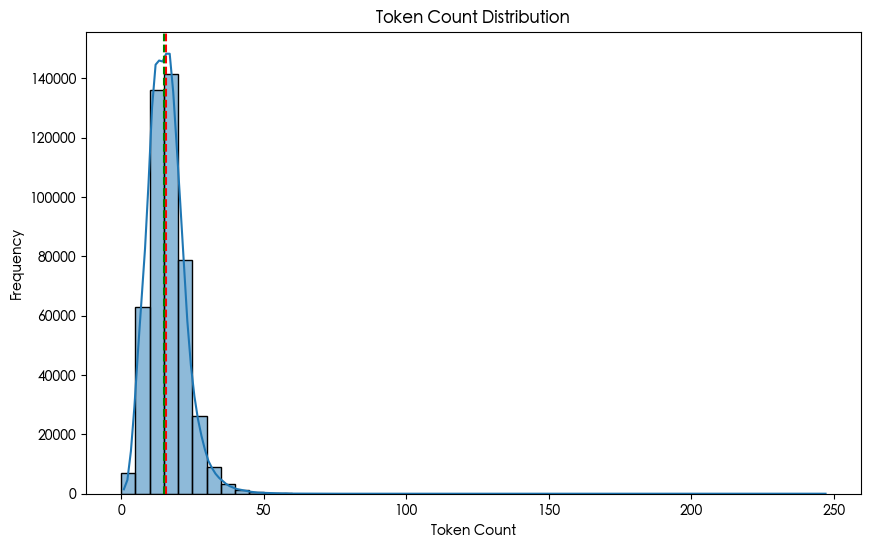

读取时间: 26.43 秒
************************************************分割线*************************************************


In [81]:
# token 计数 (spacy)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import spacy

from utils.category import load_category_list, category_list_to_dict
category_list = load_category_list('./json/mtsku_category_tree.json')
category_dict = category_list_to_dict(category_list)

nlp = spacy.blank("en")  # en_core_web_sm

csv_paths = ['./dataset/level1/train.csv',
             './dataset/level1/test.csv',
             './dataset/level1/val.csv']
total = 274423
target_index = 0


def tokenize_spacy(text: str) -> list[str]:
    doc = nlp(text)
    return [token.text for token in doc]


for index, csv_path in enumerate(csv_paths):
    if index != target_index:
        continue

    start_time = time.time()
    # 读取指定的几列
    df = pd.read_csv(csv_path, usecols=[
                     'name', 'level1_global_be_category_id'])
    print(f"文件: {csv_path}")
    print(f'数据总量: {len(df)}')

    # 计算每个标题的 token 数量
    df['token_count'] = df['name'].apply(lambda x: len(tokenize_spacy(x)))
    print(f'每个标题的 token 数量: {df["token_count"].describe()}')

    mean_count = df['token_count'].mean()  # 平均数
    median_count = df['token_count'].median()  # 中位数

    # 绘制 df['token_count'] 分布直方图 📊
    plt.figure(figsize=(10, 6))
    sns.histplot(df['token_count'], bins=range(0, 250, 5), kde=True)

    # 添加平均数和中位数的垂直线
    plt.axvline(mean_count, color='red', linestyle='--',
                label=f'Mean: {mean_count:.1f}')
    plt.axvline(median_count, color='green', linestyle='--',
                label=f'Median: {median_count:.1f}')

    plt.title('Token Count Distribution')
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.show()

    end_time = time.time()
    print(f"读取时间: {end_time - start_time:.2f} 秒")
    print(f'{"分割线":*^100}')